In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
import soundfile
import numpy as np
import librosa

def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            result = np.hstack((result, mel))
        return result


In [3]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [6]:
# Load the data and extract features
def load_data(test_size=0.2):
    x, y = [], []
    for file in glob.glob("D:\Sounds\Audio_Song_Actors_01-24/Actor_*/*.wav"):
        file_name = os.path.basename(file)
        emotion = emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [7]:
# Split the dataset
x_train, x_test, y_train, y_test = load_data(test_size=0.25)


In [8]:
x_train

array([[-6.27527405e+02,  5.33894958e+01, -1.14486599e+01, ...,
         9.81570949e-08,  1.39829606e-08,  6.95346669e-09],
       [-5.27008179e+02,  5.93238449e+01, -3.09062500e+01, ...,
         1.25772237e-06,  3.85467189e-07,  2.83235515e-08],
       [-6.52875610e+02,  7.94901505e+01, -2.89089737e+01, ...,
         2.20576819e-08,  8.28639735e-09,  7.71503128e-09],
       ...,
       [-4.68942535e+02,  4.98182716e+01, -2.75305996e+01, ...,
         1.25355257e-06,  1.32780315e-07,  1.07062315e-08],
       [-5.30277161e+02,  9.47239304e+01, -1.58366966e+01, ...,
         4.47263517e-07,  1.22199097e-07,  1.75526829e-08],
       [-5.16985779e+02,  6.73227997e+01, -2.13759327e+01, ...,
         1.90207356e-06,  3.97177530e-07,  1.05036335e-07]])

In [9]:
x_test

array([[-4.63384125e+02,  4.13261795e+01, -3.99267616e+01, ...,
         8.67971448e-06,  3.72324121e-06,  8.64692879e-07],
       [-4.80347260e+02,  5.79498367e+01, -2.61452560e+01, ...,
         7.96373513e-07,  7.60383330e-08,  8.01804667e-09],
       [-5.22353943e+02,  6.91652985e+01, -2.20316410e+01, ...,
         1.26297971e-06,  1.08898448e-07,  9.43840117e-09],
       ...,
       [-6.14944580e+02,  9.27238541e+01, -7.91106081e+00, ...,
         3.19653743e-08,  2.11106244e-08,  1.93008027e-08],
       [-6.04846313e+02,  5.40390396e+01, -2.15285206e+01, ...,
         9.57284954e-08,  3.40259412e-08,  8.21522850e-09],
       [-5.25313660e+02,  7.97557449e+01, -1.46758413e+01, ...,
         4.14087992e-07,  7.00721046e-08,  1.02587041e-08]])

In [10]:
y_train


['calm',
 'happy',
 'calm',
 'fearful',
 'happy',
 'calm',
 'fearful',
 'calm',
 'calm',
 'calm',
 'happy',
 'calm',
 'fearful',
 'calm',
 'fearful',
 'calm',
 'happy',
 'calm',
 'happy',
 'fearful',
 'calm',
 'fearful',
 'fearful',
 'calm',
 'calm',
 'calm',
 'happy',
 'fearful',
 'fearful',
 'calm',
 'happy',
 'calm',
 'calm',
 'calm',
 'fearful',
 'calm',
 'fearful',
 'calm',
 'happy',
 'happy',
 'fearful',
 'fearful',
 'happy',
 'calm',
 'calm',
 'fearful',
 'fearful',
 'calm',
 'calm',
 'happy',
 'calm',
 'calm',
 'calm',
 'calm',
 'fearful',
 'calm',
 'happy',
 'calm',
 'fearful',
 'calm',
 'happy',
 'happy',
 'happy',
 'calm',
 'calm',
 'happy',
 'fearful',
 'fearful',
 'fearful',
 'happy',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'happy',
 'fearful',
 'calm',
 'calm',
 'calm',
 'happy',
 'happy',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'happy',
 'happy',
 'fearful',
 'fearful',
 'happy',
 'calm',
 'happy',
 'fearful',
 'calm',
 'fearful',
 'calm',
 'calm',
 

In [11]:
y_test

['happy',
 'happy',
 'fearful',
 'calm',
 'fearful',
 'fearful',
 'fearful',
 'calm',
 'happy',
 'fearful',
 'calm',
 'fearful',
 'happy',
 'calm',
 'fearful',
 'fearful',
 'fearful',
 'calm',
 'calm',
 'fearful',
 'happy',
 'calm',
 'happy',
 'fearful',
 'fearful',
 'calm',
 'happy',
 'fearful',
 'calm',
 'fearful',
 'calm',
 'happy',
 'happy',
 'calm',
 'happy',
 'calm',
 'fearful',
 'fearful',
 'happy',
 'calm',
 'calm',
 'calm',
 'fearful',
 'fearful',
 'calm',
 'fearful',
 'calm',
 'calm',
 'fearful',
 'calm',
 'fearful',
 'calm',
 'happy',
 'happy',
 'happy',
 'happy',
 'fearful',
 'fearful',
 'happy',
 'calm',
 'calm',
 'calm',
 'happy',
 'happy',
 'calm',
 'happy',
 'happy',
 'fearful',
 'happy',
 'happy',
 'fearful',
 'calm',
 'fearful',
 'fearful',
 'happy',
 'calm',
 'fearful',
 'fearful',
 'happy',
 'happy',
 'fearful',
 'fearful',
 'happy',
 'calm',
 'happy',
 'happy',
 'happy',
 'happy',
 'calm',
 'happy',
 'calm',
 'calm',
 'fearful',
 'happy',
 'fearful',
 'fearful',
 '

In [12]:
# Shapes of the splits
print(x_train.shape)
print(x_test.shape)
print(len(y_train))
print(len(y_test))

(414, 180)
(138, 180)
414
138


In [35]:
import os
import sounddevice as sd
import librosa

# Define a function to play audio
def play_audio(audio_path):
    audio_data, sample_rate = librosa.load(audio_path)
    sd.play(audio_data, sample_rate)
    sd.wait()

# Define the emotions dictionary
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# Directory containing the audio files
directory = "D:\Sounds\Audio_Song_Actors_01-24"

# Iterate over the emotion categories and play the first audio file
for i in range(1, 25):
    emotion = emotions[str(i).zfill(2)]
    actor_directory = os.path.join(directory, f"Actor_{str(i).zfill(2)}")
    audio_files = os.listdir(actor_directory)
    audio_files.sort()
    first_audio = audio_files[0]
    audio_path = os.path.join(actor_directory, first_audio)
    
    print("Emotion:", emotion)
    play_audio(audio_path)
    input("Press Enter to continue...")


Emotion: neutral
Press Enter to continue...
Emotion: calm
Press Enter to continue...
Emotion: happy


KeyboardInterrupt: Interrupted by user

In [15]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(414, 138)


In [16]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [17]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [18]:
#DataFlair - Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [19]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

In [20]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 89.86%


In [21]:
import joblib

# Save the model to a file
joblib.dump(model, 'model_file2.pkl')


['model_file2.pkl']

In [22]:
# Load the saved model from a file
loaded_model = joblib.load('model_file2.pkl')


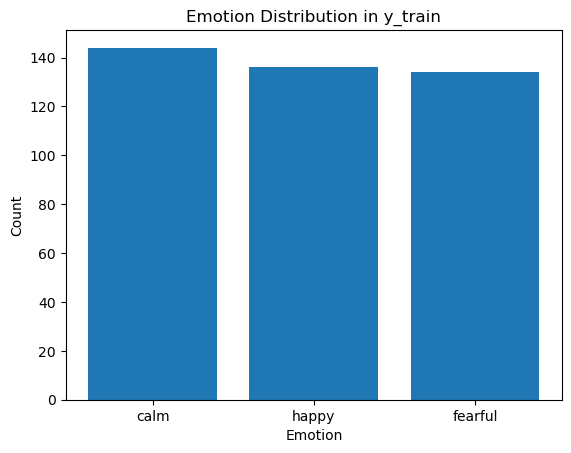

In [23]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the occurrences of each emotion label
emotion_counts = Counter(y_train)

# Get the unique emotion labels
unique_emotions = list(emotion_counts.keys())

# Get the count of each emotion label
emotion_values = list(emotion_counts.values())

# Plot the emotion distribution
plt.bar(unique_emotions, emotion_values)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution in y_train')
plt.show()


In [ ]:
import os
import glob
import librosa
from IPython.display import Audio, display

# Emotions in the RAVDESS dataset
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# Directory containing the audio files
directory = "D:\Sounds\Audio_Song_Actors_01-24"

# Iterate over the emotion categories and play the first audio file from each actor
for i in range(1, 9):
    emotion = emotions[str(i).zfill(2)]
    actor_directory = os.path.join(directory, f"Actor_{str(i).zfill(2)}")
    audio_files = glob.glob(os.path.join(actor_directory, "*.wav"))
    
    if len(audio_files) > 0:
        audio_file = audio_files[0]
        audio_data, sample_rate = librosa.load(audio_file)
        
        print("Emotion:", emotion)
        display(Audio(audio_data, rate=sample_rate))
        input("Press Enter to continue...")


Emotion: neutral


Press Enter to continue...
Emotion: calm


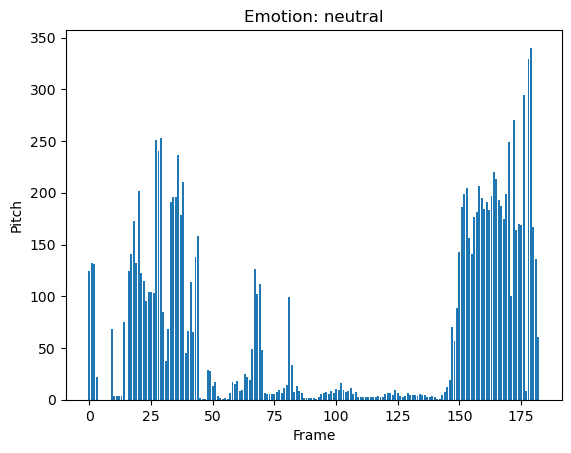

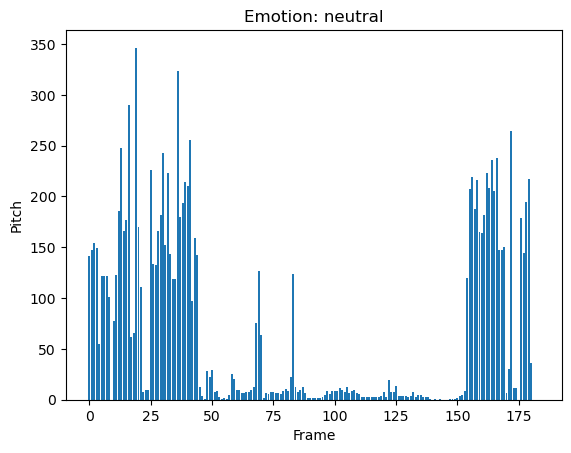

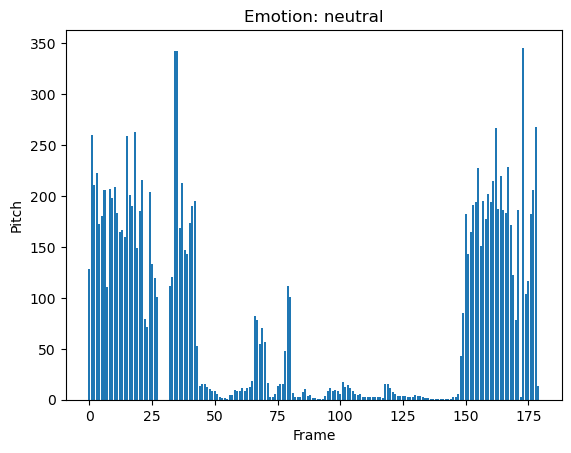

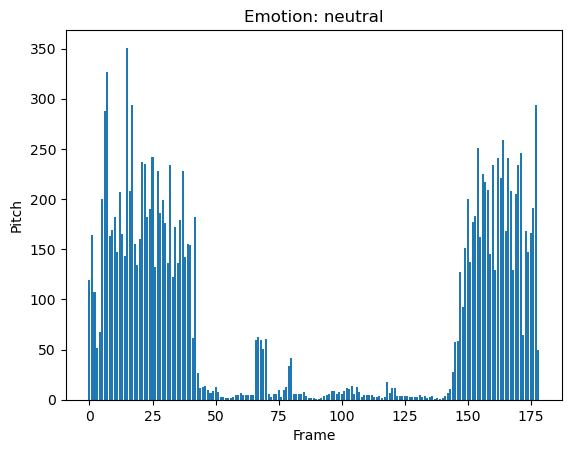

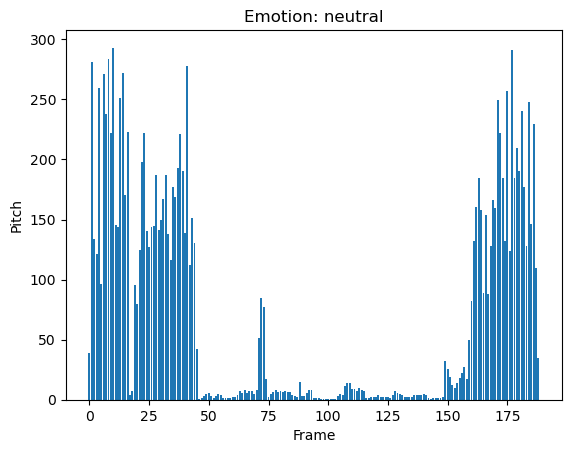

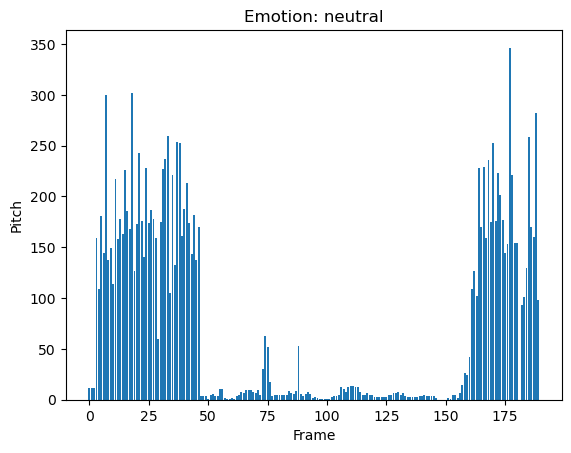

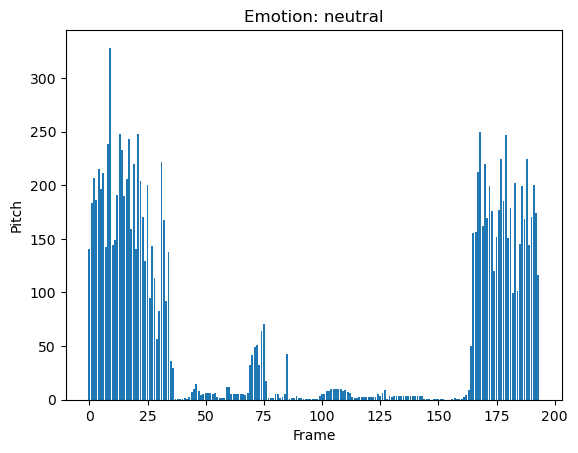

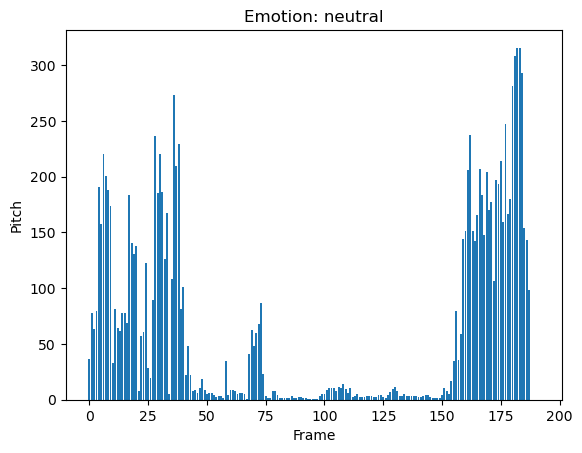

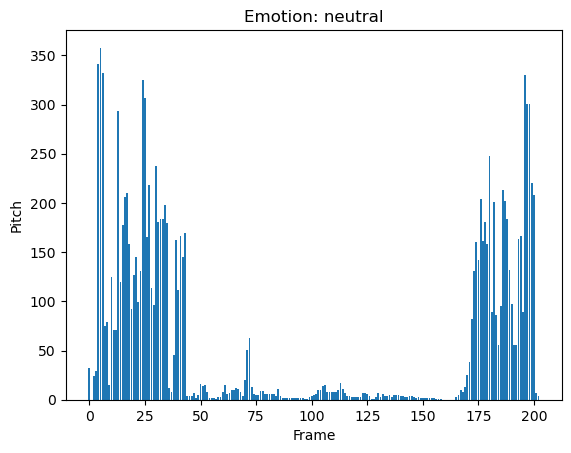

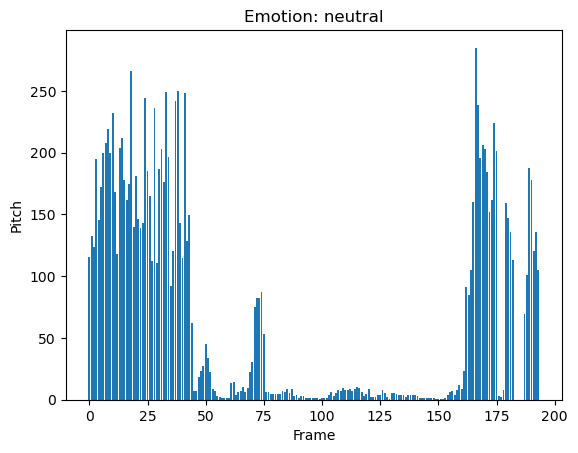

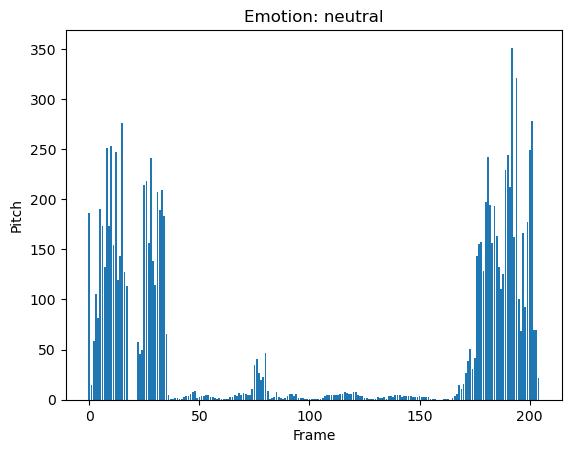

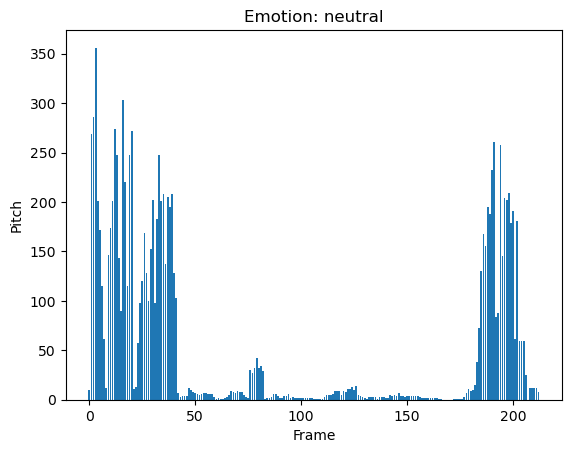

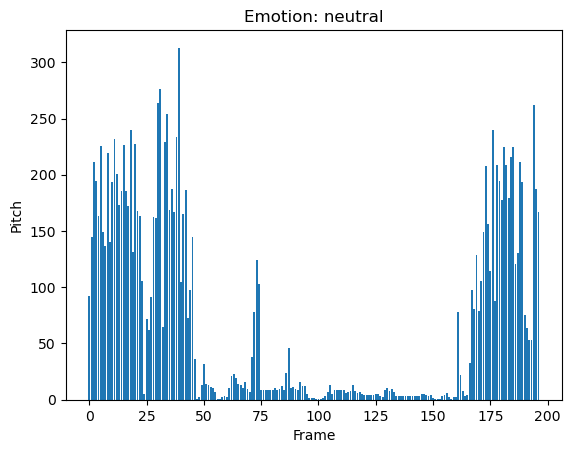

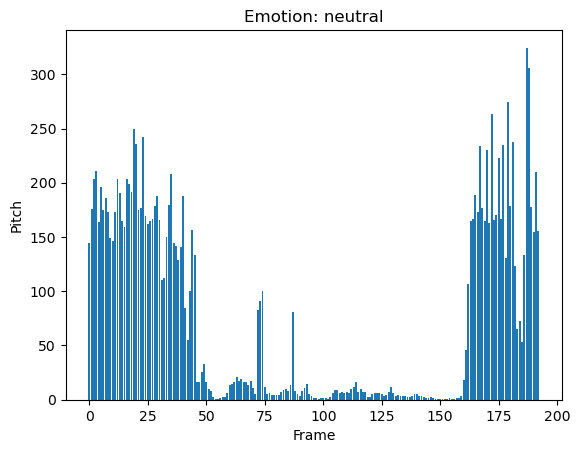

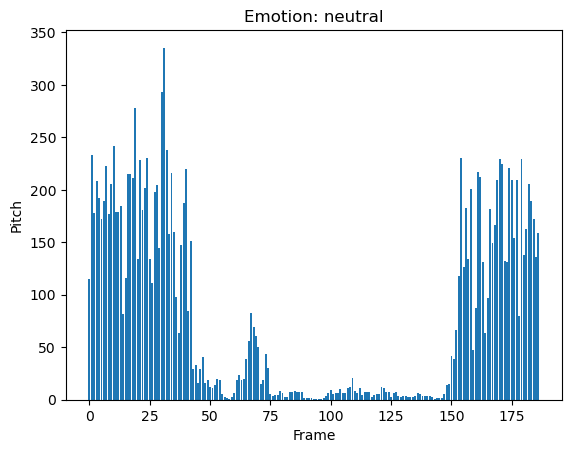

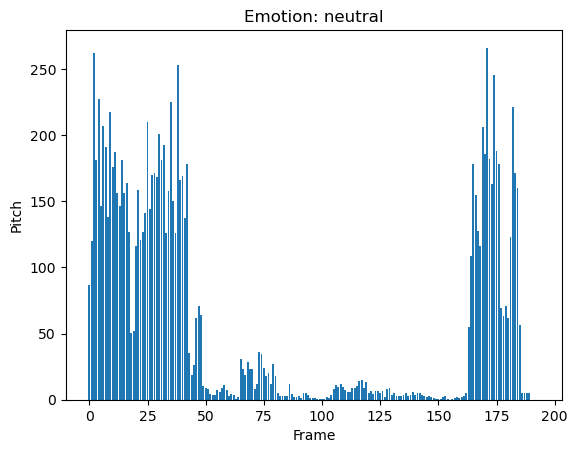

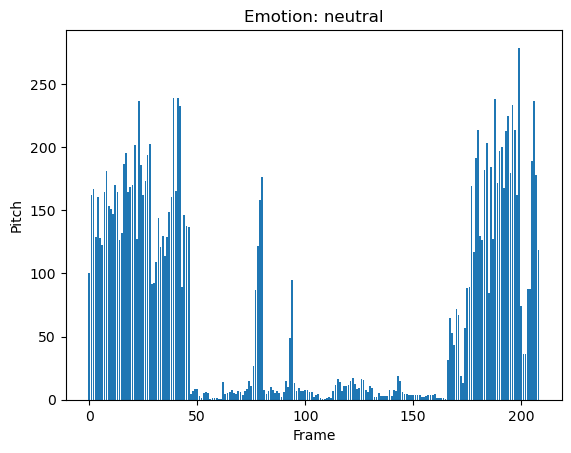

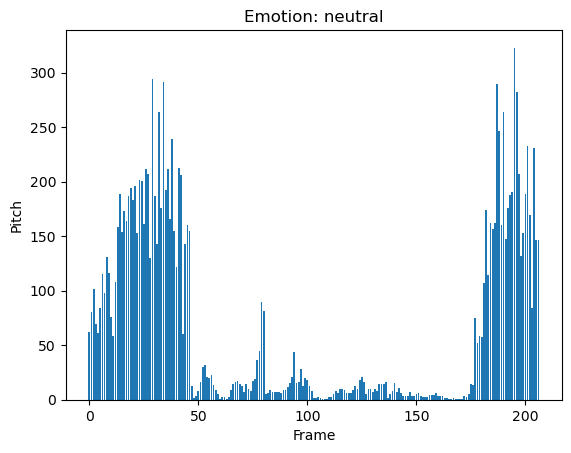

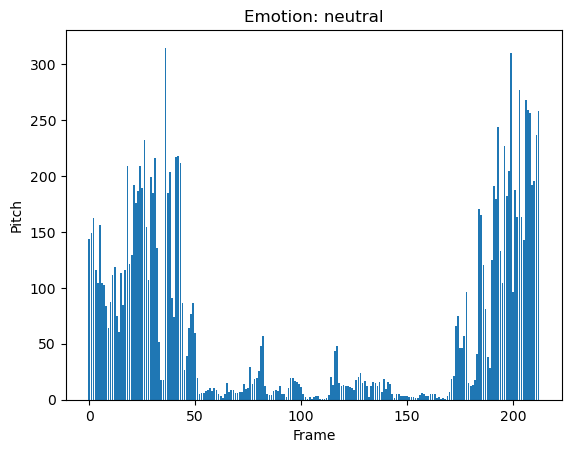

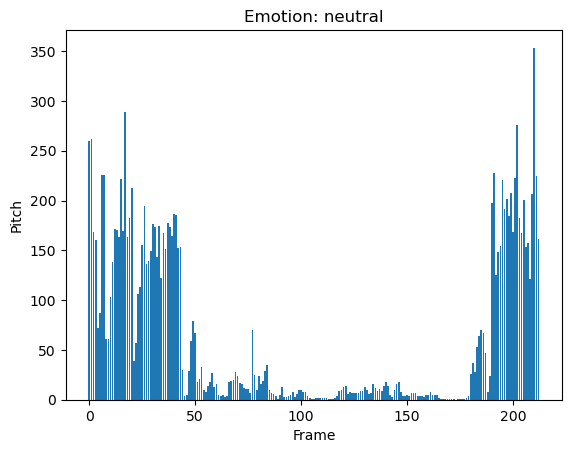

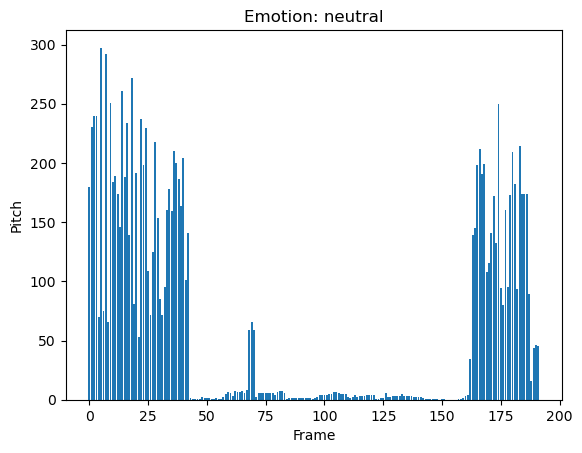

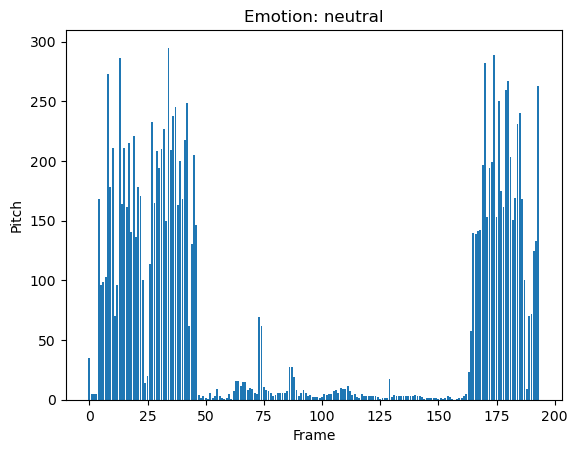

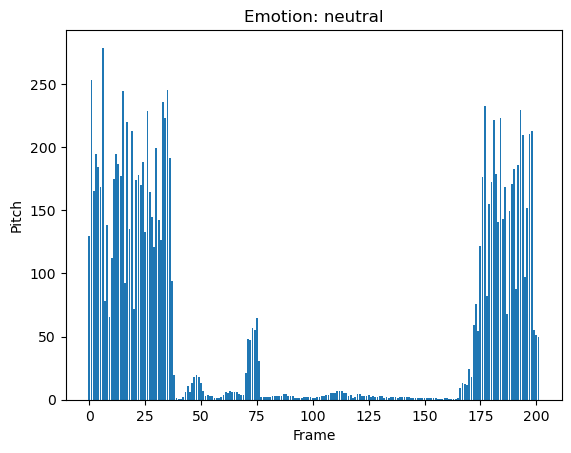

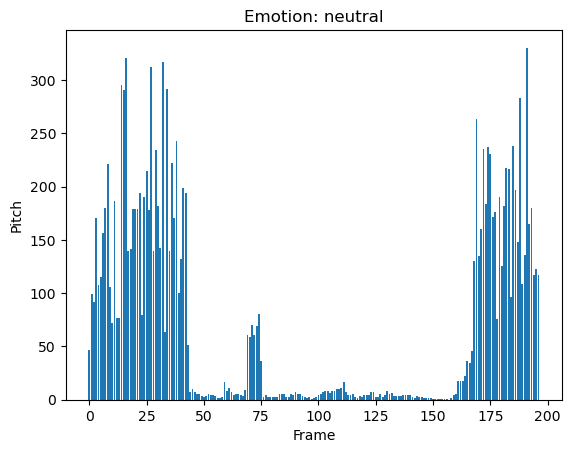

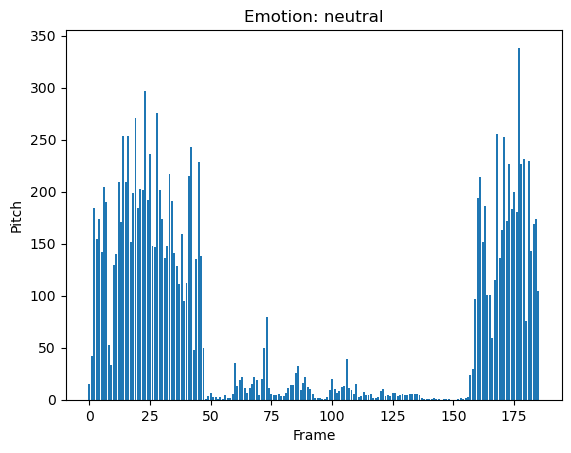

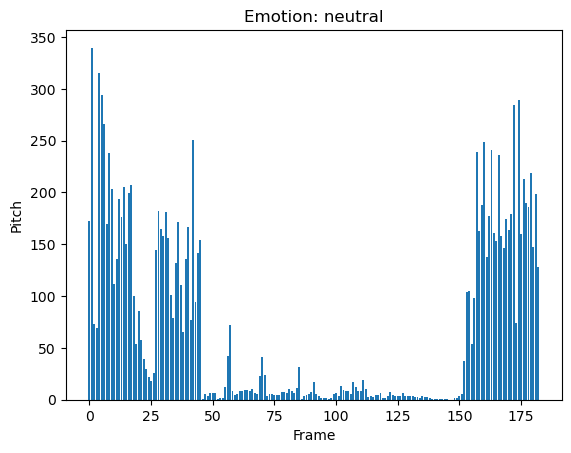

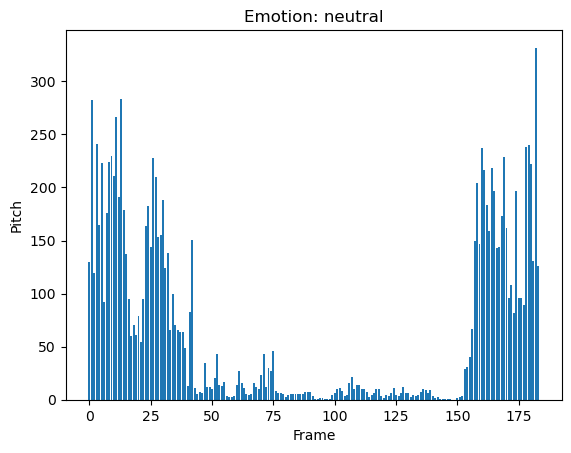

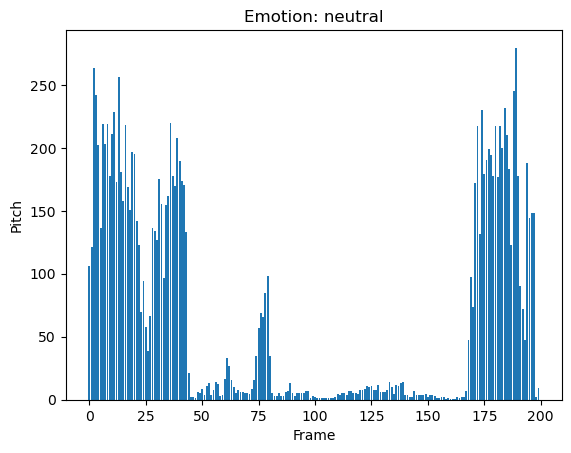

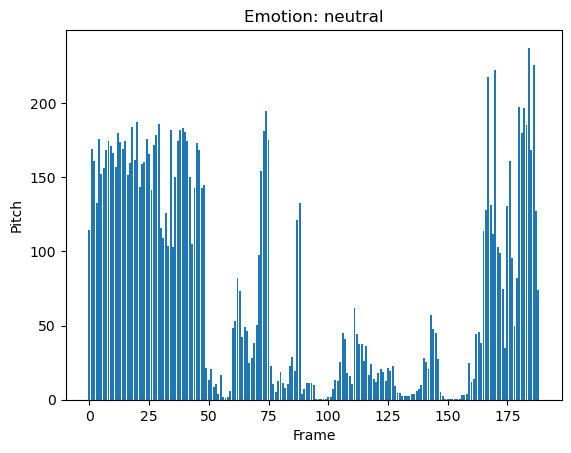

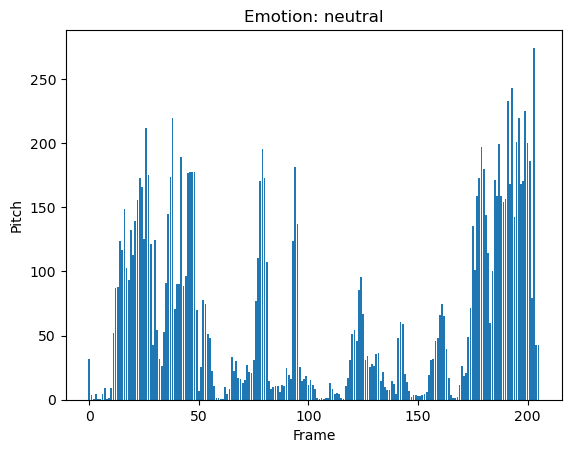

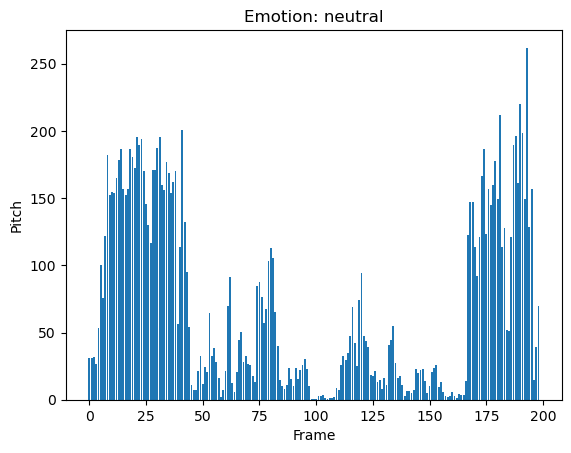

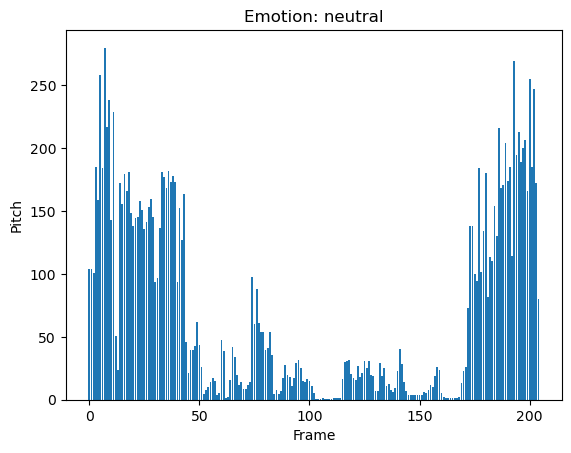

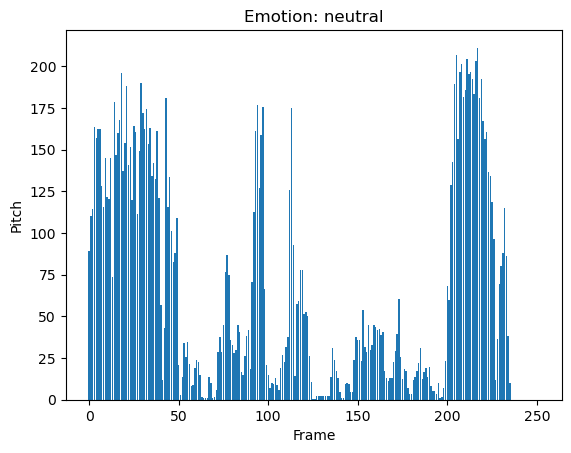

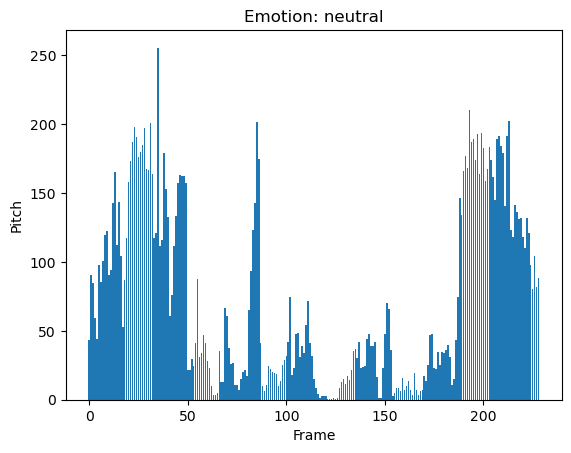

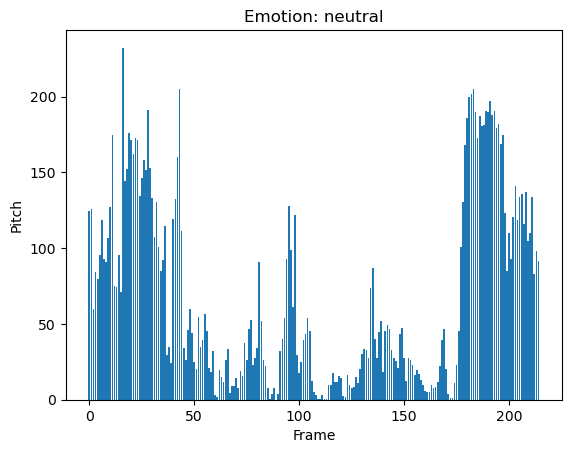

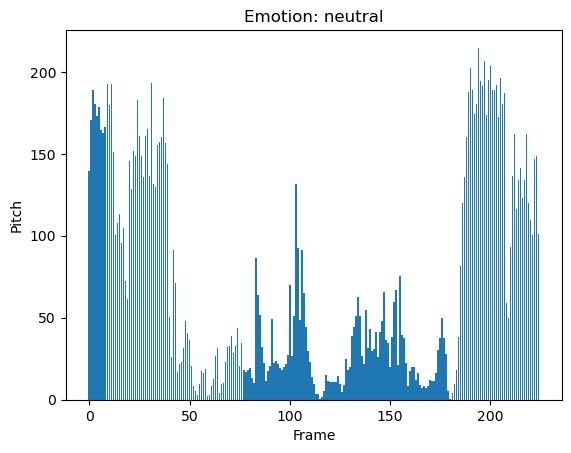

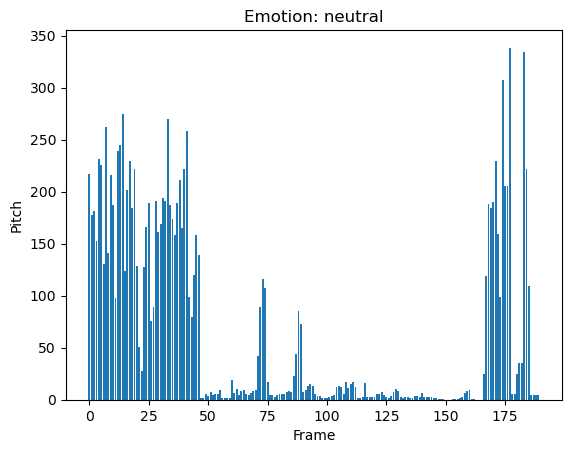

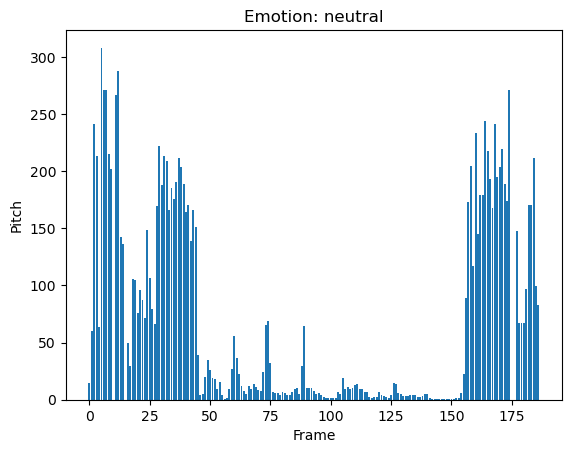

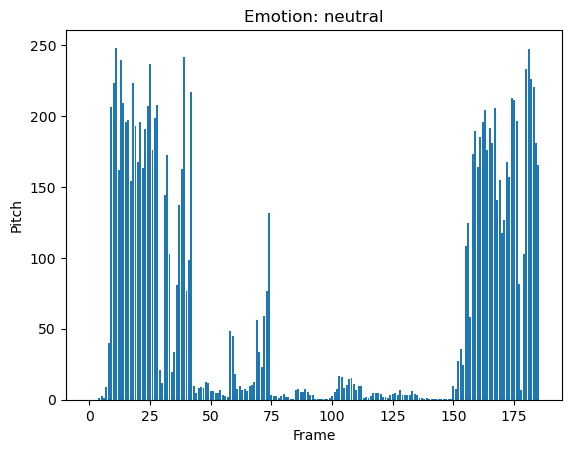

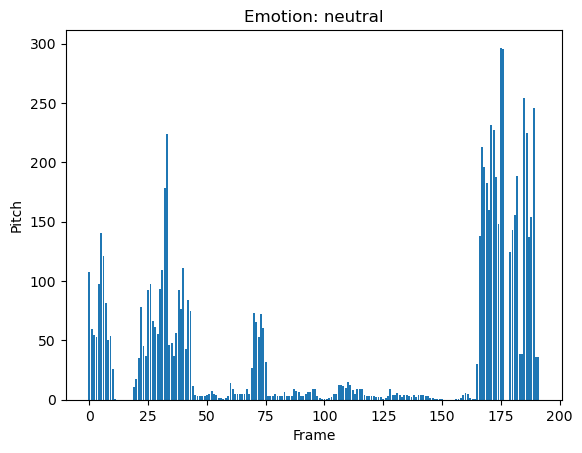

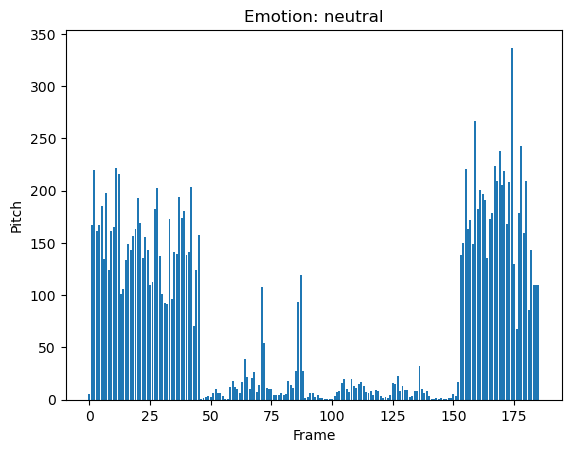

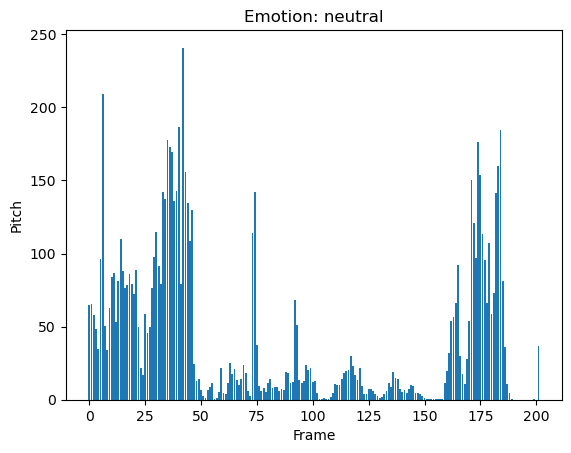

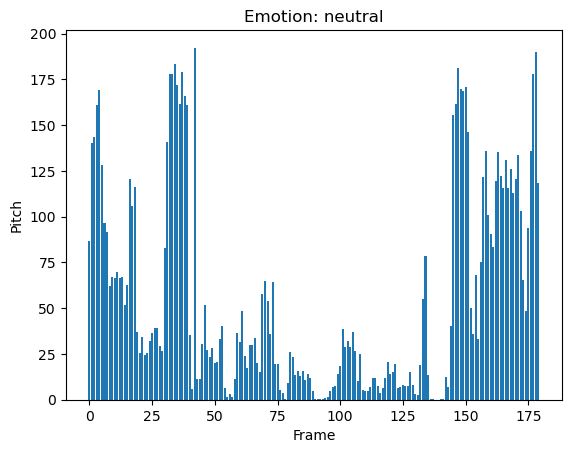

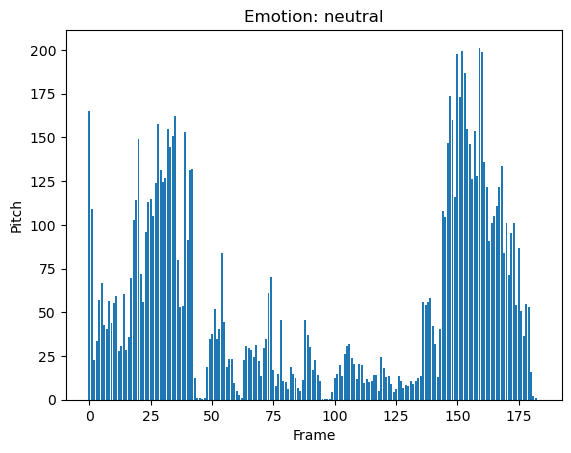

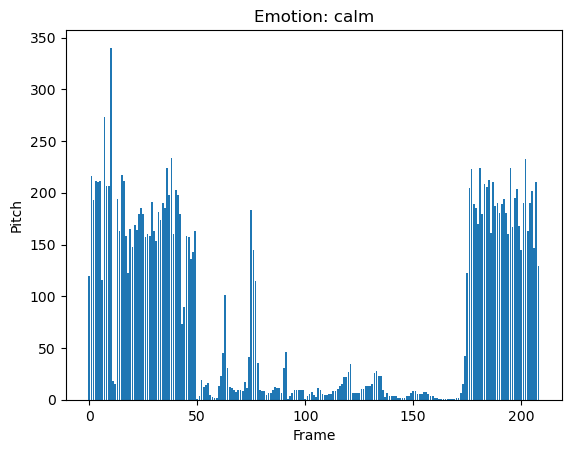

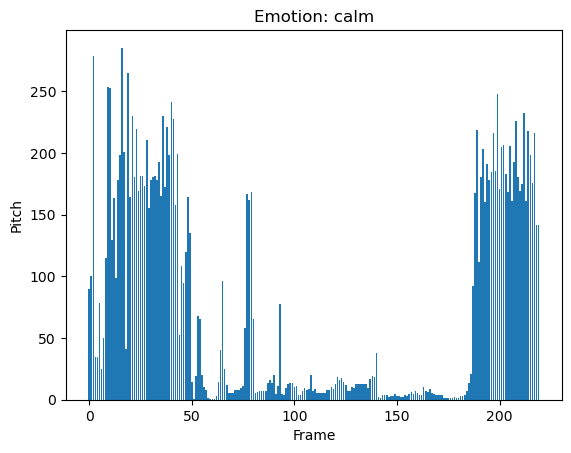

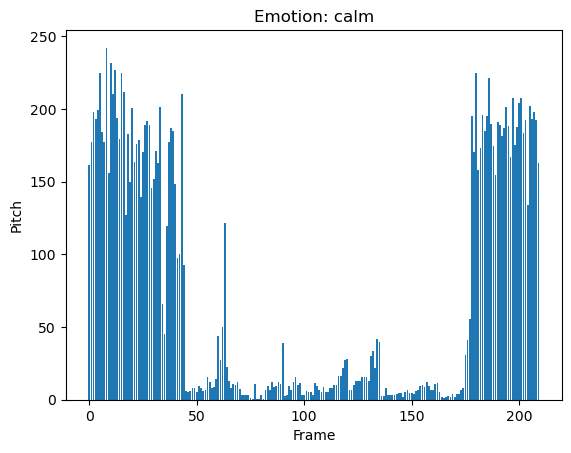

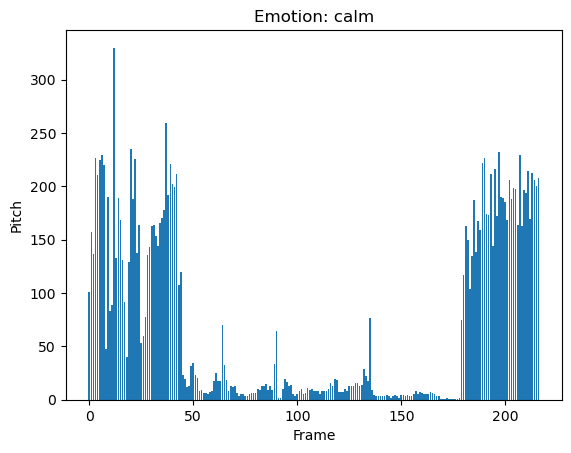

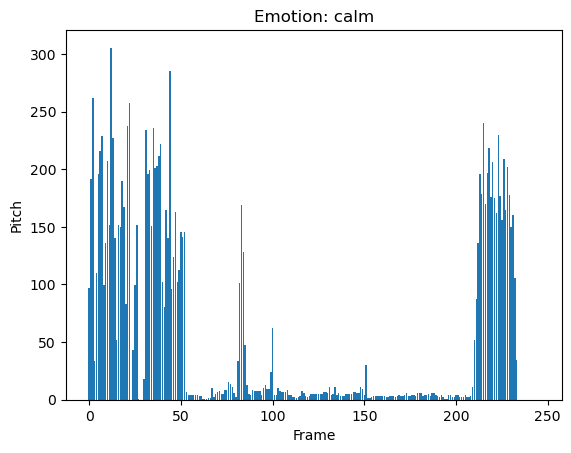

KeyboardInterrupt: 

In [28]:
import os
import glob
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Emotions in the RAVDESS dataset
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# Directory containing the audio files
directory = "D:/Sounds/Audio_Song_Actors_01-24"

# Iterate over the emotion categories and plot the pitch for each voice
for i in range(1, 25):
    emotion = emotions.get(str(i).zfill(2))
    actor_directory = os.path.join(directory, f"Actor_{str(i).zfill(2)}")
    audio_files = glob.glob(os.path.join(actor_directory, "*.wav"))
    
    for audio_file in audio_files:
        audio_data, sample_rate = librosa.load(audio_file)
        pitches, magnitudes = librosa.core.piptrack(y=audio_data, sr=sample_rate)
        average_pitch = np.mean(pitches, axis=0)
        
        plt.figure()
        plt.bar(range(len(average_pitch)), average_pitch)
        plt.xlabel("Frame")
        plt.ylabel("Pitch")
        plt.title(f"Emotion: {emotion}")
        plt.show()


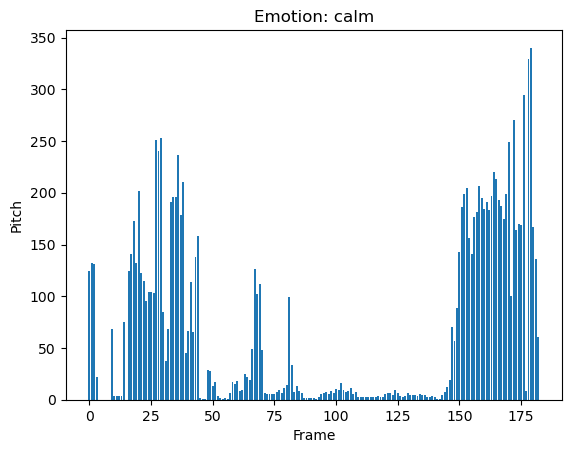

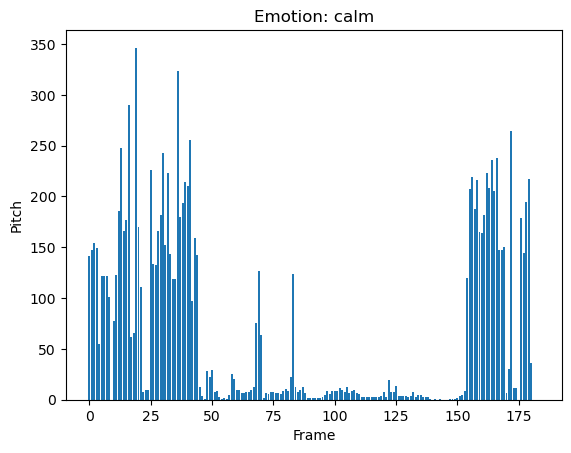

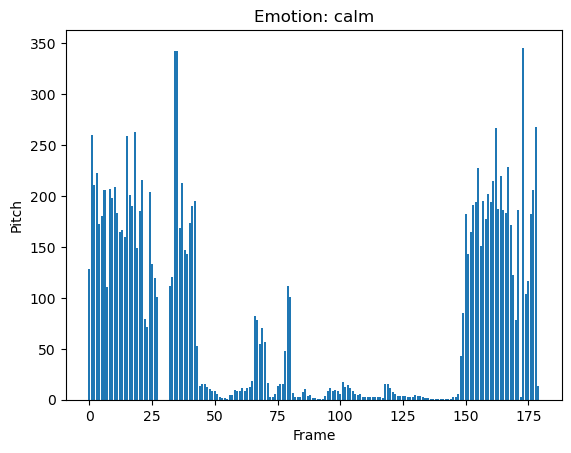

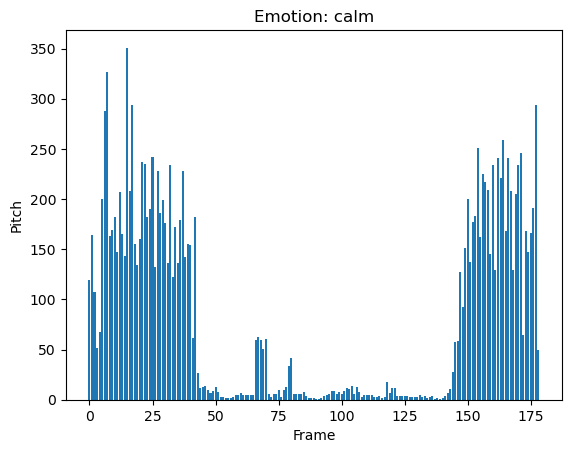

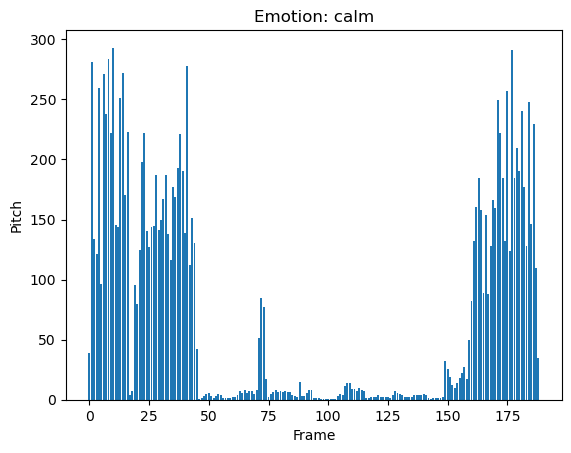

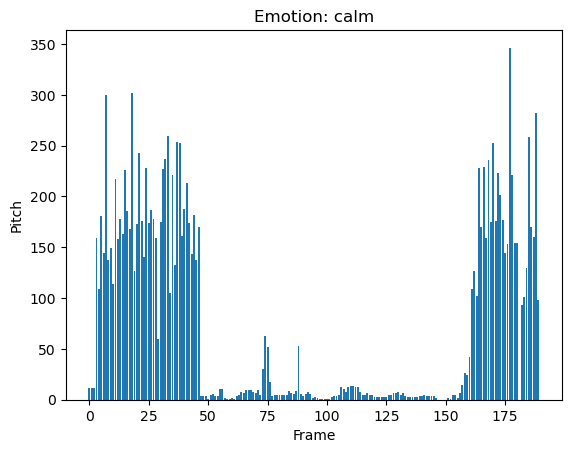

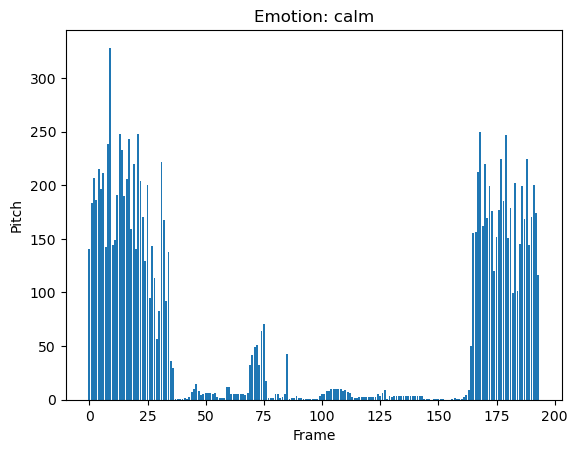

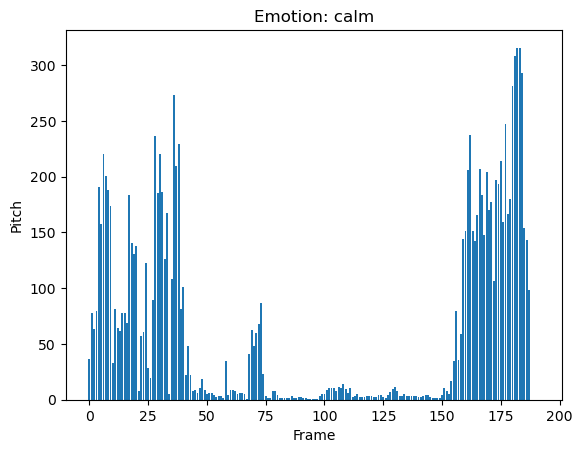

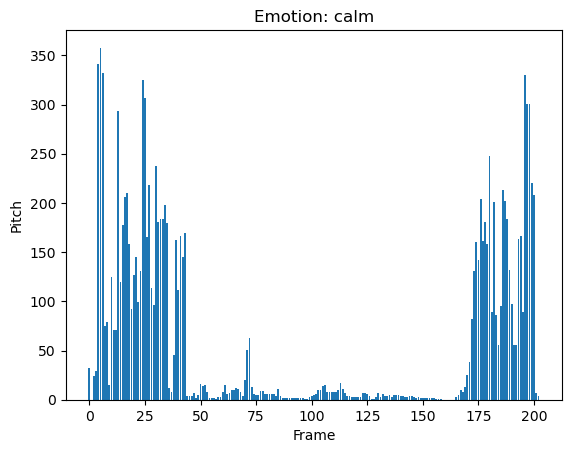

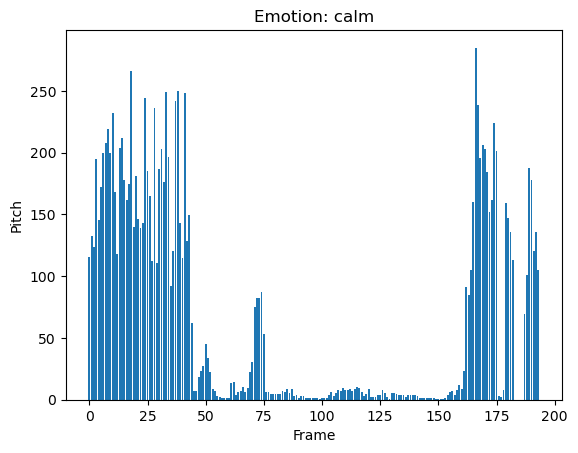

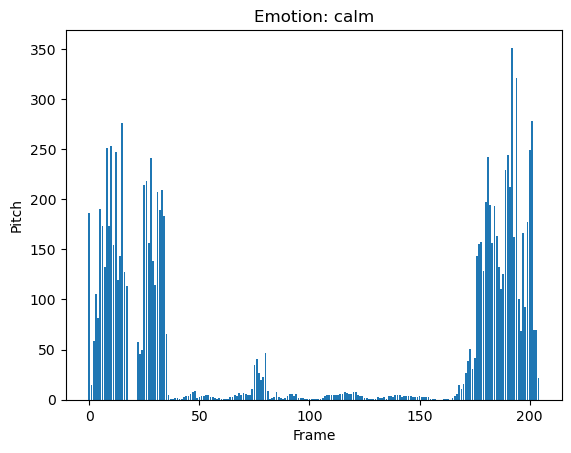

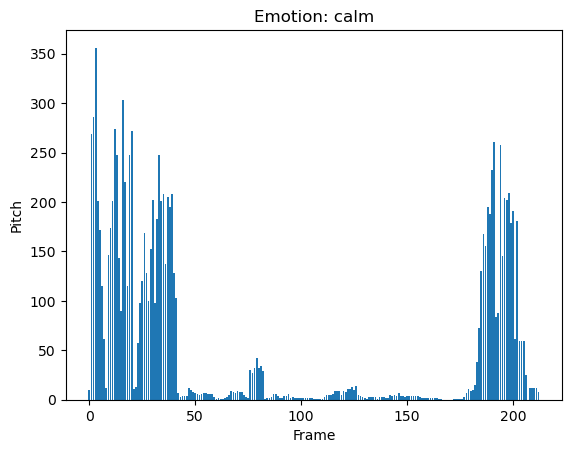

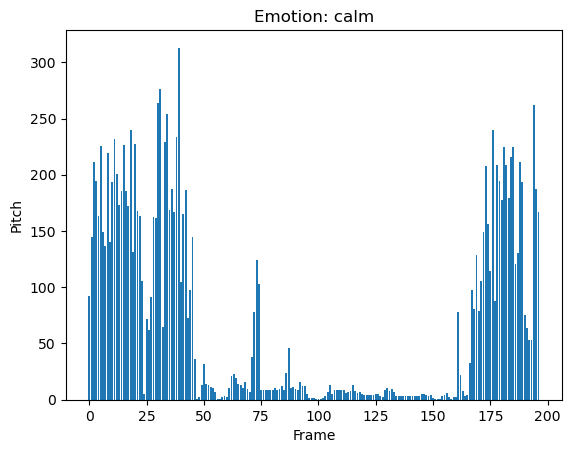

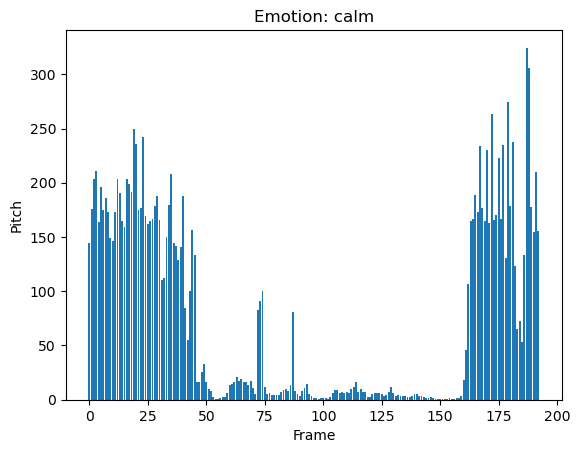

KeyboardInterrupt: 

In [29]:
import os
import glob
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Emotions in the RAVDESS dataset
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# Directory containing the audio files
directory = "D:/Sounds/Audio_Song_Actors_01-24"

# Iterate over the emotion categories and plot the pitch for each voice
for i in range(1, 25):
    actor_directory = os.path.join(directory, f"Actor_{str(i).zfill(2)}")
    audio_files = glob.glob(os.path.join(actor_directory, "*.wav"))
    
    for audio_file in audio_files:
        emotion = emotions.get(audio_file.split("-")[2])
        audio_data, sample_rate = librosa.load(audio_file)
        pitches, magnitudes = librosa.core.piptrack(y=audio_data, sr=sample_rate)
        average_pitch = np.mean(pitches, axis=0)
        
        plt.figure()
        plt.bar(range(len(average_pitch)), average_pitch)
        plt.xlabel("Frame")
        plt.ylabel("Pitch")
        plt.title(f"Emotion: {emotion}")
        plt.show()
